In [1]:
import numpy as np
import math
from numpy.random import default_rng as rng
rand = rng().uniform
from tabulate import tabulate
import matplotlib.pyplot as plt
import lmfit as lf

asin = np.arcsin
pi = np.pi
mean = np.mean #sum/number
var = np.var #sum(entry - mean)^2/number
sqrt = np.sqrt
ln = math.log

# Q2d

In [2]:
l = 1; t = 2; num = int(1e+06); results = [];
for i in range(num):
    s = 0; q = 0;
    while s < t:
        q = s #save the last value of q. 
        #this means that, when s passes t, 
        #we know what it last was when it was below t.
        s += rng().exponential(1/l)
    results.append(q)
print(mean(results))
print(t+np.exp(-l*t)/l-1/l) #check vs. theory

1.136101854751639
1.1353352832366128


# Q3b

In [3]:
num = int(1e+3); t = 5; dt = 1e-5; successes=0;
for i in range(num):
    s = 1; Z = rng().normal();
    #rather than start at 0 and build up to 1, discarding all data in (0,1),
    #I start at t=1 by selecting Z(1) at random.
    firstregion = False; secondregion = False;
    while s<t:
        store = Z
        Z += rng().normal(scale=sqrt(dt));
        s += dt
        if s<=2:
            if (Z == 0) or ((store + Z < store) ^ (store + Z < Z)):
    #If the sum of two values is less than one value but greater than the other,
    #the two values must be opposite in sign. (^ is the exclusive or)
                firstregion = True;
                Z += rng().normal(scale=sqrt(3-s)); s = 3;
                #If we made it, jump up to the next region of interest, like beginning
        if (s>2) and not firstregion:
            s = 5 #We missed our criteria, so just abandon ship here.
        if (s>=3) and (s<=5):
            if (Z == 0) or ((store + Z < store) ^ (store + Z < Z)):
                secondregion = True; successes += 1;
                s = 5 #We reached our criteria, so jump to the next round.
print(successes/num)        

KeyboardInterrupt: 

# Q4

In [ ]:
xplot = np.linspace(0,2,int(1e+06))
plt.plot(xplot,ln(5)/(2-xplot**2/2))
plt.ylim(0,10)

C:\Users\stard\AppData\Local\Temp\ipykernel_18200\618365404.py:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(xplot,ln(5)/(2-xplot**2/2))


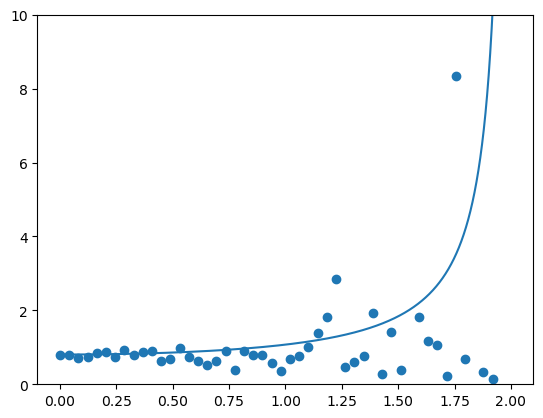

In [4]:
xplot = np.linspace(0,2,int(1e+06))
plt.plot(xplot,ln(5)/(2-xplot**2/2))

dt = 1e-5; t=5; a=1; m=2;
num = int(1e+4); x = np.linspace(0,2,int(5e+01)); y = []
for i in x:
    total = 0; current = a; s=0;
    for j in range(num):
        while current < t:
            s += dt
            current += current*(2*dt + i*rng().normal(scale=sqrt(dt)))
            if(current == 0):
                s = np.inf
                current = 5
        total += s
        if total == np.inf:
            break
    y.append(total/num)
    
#print(y)
plt.scatter(x,y,marker='o')
plt.ylim(0,10)
plt.show()